In [25]:
import pandas as pd
from sklearn.svm import SVR
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv('Dataset.csv')

In [3]:
object_cols = df.select_dtypes(include=['object']).columns

In [4]:
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [5]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [6]:
X = df.drop(['Restaurant ID', 'Restaurant Name', 'Aggregate rating'], axis=1)
y = df['Aggregate rating']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train, y_train)



SVR(C=1000.0, gamma=0.1)

In [9]:
y_pred = svr.predict(X_test)


In [10]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 2.26


In [11]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

R-squared: 0.01


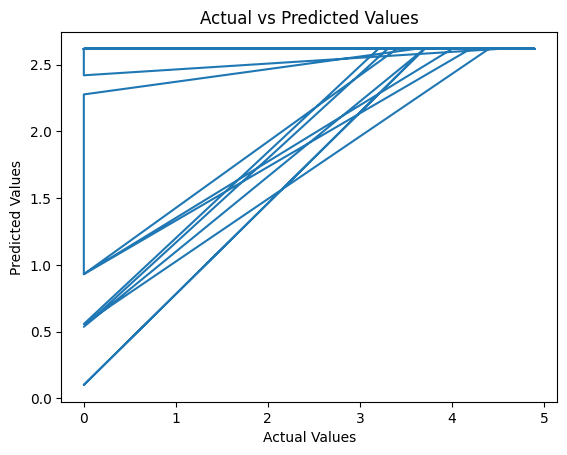

In [14]:
plt.plot(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

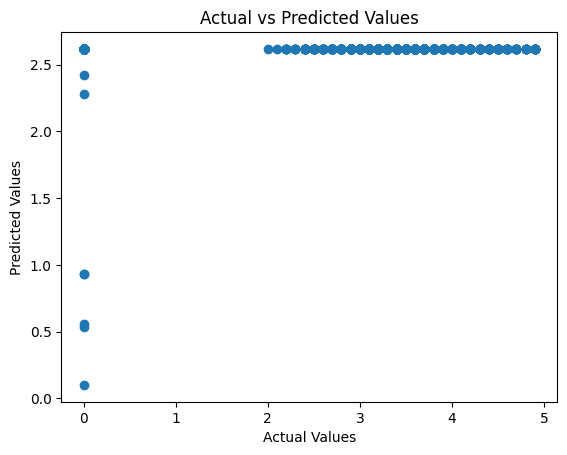

In [17]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

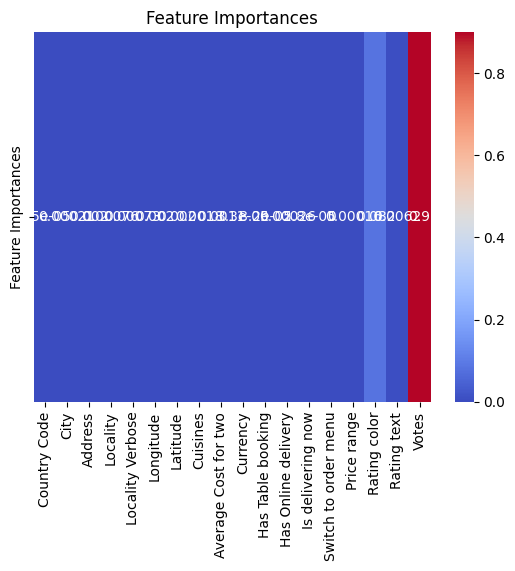

In [24]:

svr.fit(X, y)  # Train the model

feature_importances = model.feature_importances_


sns.heatmap([feature_importances], annot=True, cmap='coolwarm',
            xticklabels=X.columns, yticklabels=['Feature Importances'])
plt.title('Feature Importances')
plt.show()